## Chapter 11 힘의 장 시뮬레이션하기
#### 물리학에서는 자석이나 정전기가 대전된 풍선과 같은 이러한 힘의 원천이 주변에 보이지 않는 힘의 장을 생성한다고 상상한다.
#### 지구의 중력이 만든 힘의 장, 즉 지구의 중력장 어디에서도 객체는 지구를 향한 인력을 느낀다.
#### 이번 장에서는 소행성 게임에 중력장을 추가할 것이다.
#### 힘의 장은 벡터장이라는 수학 함수로 모델링된다.
---
### 11.1 벡터장으로 중력 모델링하기
#### 벡터장은 공간의 모든 점에 벡터를 할당한다. 
#### 중력장은 어떤 점에서 중력이 얼마만큼의 세기로 어떤 방향으로 당기는지를 설명해주는 벡터장이다.
#### 여러 점을 선택하고 각 점에 할당된 벡터를 해당 점에서 시작하는 화살표로 그려 벡터장을 시각화 할 수 있다.
#### 블랙홀 주위의 모든 화살표는 중력을 향한다. 또한 블랙홀에 가까워질수록 중력이 강하기 때문에 화살표가 길어진다.
#### 파이썬에서 2차원 벡터장은 한점을 나타내는 2차원 벡터를 입력으로 받아 그 점에 작용하는 힘에 해당하는 2차원 벡터를 리턴하는 함수이다.
---
### 11.1.1 위치에너지 함수로 중력 모델링하기
#### 중력장을 모델링한 뒤, 위치에너지라고 알려진 거리를 두고 작용하는 힘을 나타내는 새로운 멘탈 모델을 볼 것이다.
#### 위치에너지는 운동으로 변환될 준비가 된 저장된 에너지로 생각할 수 있다.
#### 우주선을 블랙홀에서 당겨낼수록 우주선에 더 많은 위치에너지가 축적되고, 당기전 우주선을 놓으면 우주선은 더 빨리 나아가게 된다.
#### 공간의 모든 점에 수를 할당하는 것을 스칼라 장이라고 한다.
#### 스칼라장을 시각화하기 위해 Matplotlib을 사용할 것이다. 
#### 아래서 만들 히트맵은 우주선이 블랙홀에서 멀리 떨어져 있을수록 색상이 더욱 밝아진다. 이것은 위치에너지가 크다는 것을 의미하게 된다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

def f(x,y):
    return (-2 * y, x)

def u(x,y):
    return 0.5*(x**2 + y**2)

<ipython-input-2-038c681127f4>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X,Y,z, cmap = 'plasma')


<Figure size 504x504 with 0 Axes>

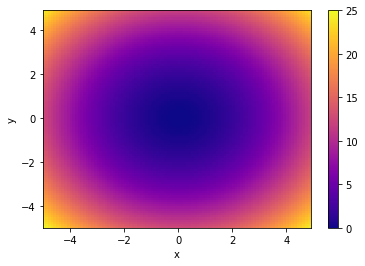

In [2]:
def scalar_field_heatmap(f, xmin, xmax, ymin, ymax, xstep = 0.1, ystep = 0.1):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    
    fv = np.vectorize(f)
    
    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X,Y)
    z = fv(X,Y)
    
    fig, ax = plt.subplots()
    
    c = ax.pcolormesh(X,Y,z, cmap = 'plasma')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax = ax)
    plt.xlabel('x')
    plt.ylabel('y')

scalar_field_heatmap(u, -5, 5, -5, 5)

---
## 11.2 중력장 모델링하기
#### 벡터장은 공간의 모든 점에 벡터를 할당할 것이다.
#### 우리는 2차원의 모든 점에 2차원 벡터를 할당하는 2차원 벡터장만을 중심적으로 살펴볼 것이다.
#### 2차원 벡터를 입력으로 받아서 2차원 벡터를 출력으로 리턴하는 함수를 만들 것이다.
---
### 11.2.1 벡터장 정의하기
#### 2차원 평면에서 벡터장은 두 좌표 x와 y를 나타내는 벡터를 입력으로 받는 함수 F(x,y)이다. 
#### 이 함수는 점 (x,y)에서 벡터장 값에 해당하는 별도의 2차원 벡터를 리턴한다.
#### 출력 벡터는 입력 벡터로 주어진 평면 상의 점에서 시작하는 화살표로 그릴 것이다.
#### 값을 많이 생성해서 어떻게 생겼는지 확인해보겠다.

In [3]:
def plot_vector_field(f,xmin,xmax,ymin,ymax, xstep = 1, ystep =1):
    X,Y = np.meshgrid(np.arange(xmin,xmax,xstep), np.arange(ymin,ymax,ystep))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X,Y,U,V, color = 'red')
    fig = plt.gcf()
    fig.set_size_inches(7,7)

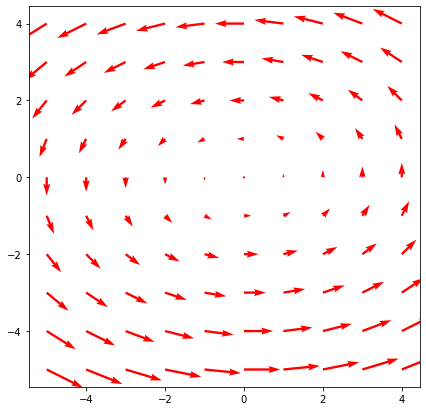

In [4]:
plot_vector_field(f,-5,5,-5,5)
# 만약 화살표를 더 많이 그려 화살표가 겹치기 시작해 보기 어려워진다면 벡터의 길이를 상수 배수로 축소하면 된다.

---
### 11.2.2 간단한 힘의 장 정의하기
#### 중력은 힘의 원천에 가까워질수록 강해진다.
#### 현실적이진 않지만 간단한 중력장 모델을 만들어보겠다.
#### F(r) = -r 을 사용해 화면 안쪽으로 작용하는 중력장을 표현해보겠다.
#### 만들 벡터장은 어디서나 원점을 향하고, 멀리갈수록 강해진다는 특성이 있다.

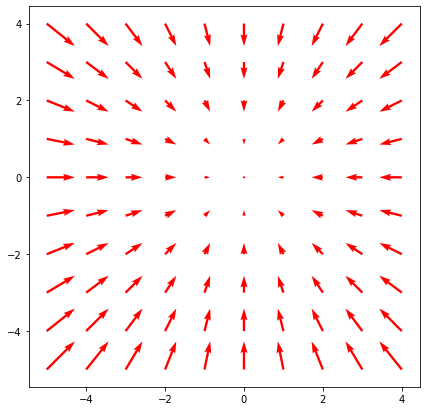

In [5]:
def r(x,y):
    return (-x,-y)

plot_vector_field(r,-5,5,-5,5)

## 11.3 소행성 게임에 중력 추가하기
#### 소행성 게임의 블랙홀은 원점에서의 같은 거리만큼 떨어진 꼭짓점 20개로 Polygon Model 객체며 원 모양이다.
#### 블랙홀의 중력으로 인한 인력의 강도는 하나의 수로 나타낼 것이다.

In [6]:
from asteroids1 import *
from vectors import *
from colors import * 
from draw3d import * 
from linear_solver import *

pygame 2.1.2 (SDL 2.0.18, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [7]:
class BlackHole(PolygonModel):
    def __init__(self,gravity):
        vs = [vectors.to_cartesian((0.5,2*pi*i/20))
                     for i in range(0,20)]
        super().__init__(vs)
        self.gravity = gravity

In [8]:
black_hole = BlackHole(0.1)

In [9]:
def gravitational_field(source,x,y):
    relative_position = (x - source.x , y - sourec.y)
    return vectors.scale(-source.gravity,relative_position)

#### source는 BlackHole 클래스의 객체이고, x속성과 y속성은 PolygonModel 클래스에 포함되는 객체로써 그 중심을 나타내며, gravity속성은 BlackHole의 생성자에 전달된 값이다.
---
### 11.3.1 게임 객체가 중력을 받도록 하기
#### 앞에서 벡터장이 중력장으로 사용될 때에는 위치(x,y)에 있는 객체의 힘이 아니라 객체의 단위 질량당 힘을 알려준다.
#### 즉 질량이 m인 객체에 가해지는 전체 힘은 F(x,y) = m * g(x,y)이다. 
#### F = ma에서 다른 힘을 받지 않는다고 가정하면 a = g(x,y)가 될것이다.
  
#### 이전에는 스크린 밖으로 날아간 객체를 반대쪽으로 이동시켰는데 이번에는 튕겨 나오도록 설정해보겠다.

In [10]:
def move(self,milliseconds, thrust_vector, gravity_source):
    tx,ty = thrust_vector
    gx,gy = gravitational_field(gravity_source, self.x, self.y)
    ax = tx + gx
    ay = ty + gy
    self.vx += ax * milliseconds / 1000
    self.vy += ay * milliseconds / 1000
    self.x += self.vx * milliseconds / 1000.0
    self.y += self.vy * milliseconds / 1000.0
    
    if bounce :
        if self.x <-10 or self.x > 10:
            self.vx = -self.vx
        if self.y < -10 or self.y > 10:
            self.vy = -self.vy
    else:
        if self.x < -10:
            self.x += 20
        if self.x >10:
            self.x -=20
        if self.y < -10:
            self.y += 20
        if self.y <10 :
            self.y -= 20

In [ ]:
while not done:
    for ast in asteroids:
        ast.move(milliseconds, (0,0), black_hole)
        
    thrust_vector = (0,0)
    if keys[pygame.K_UP]:
        thrust_vectors.to_cartesian((thrust,ship.rotation_angle))
    elif keys[pygame.K_DOWN]:
        thrust_vector = vectors.to_cartesian((-thrust,ship.rotation_angle))
    ship.move

In [12]:
main(asteroids = default_asteroids)
# 게임 돌아가는거 확인

#### 블랙홀의 중력 외에 어떠한 힘도 받지 않는 객체는 곧바로 빨려 들어가거나 타원 궤도로 진입하게된다.
---
## 11.4 위치에너지 도입하기
#### 위치에너지를 사용해서 우주선 및 소행성의 행동을 묘사하는 두번째 모델을 만들어보겠다.
#### 중력을 모든 점에 대한 힘 벡터로 보고 원천이 객체를 끌어당긴다고 상상하기보다 중력장에 있는 객체를 사발 안을 굴러다니는 구슬로 생각한다.
#### 즉 굴러가는 동안에 가장 밑바닥으로 이동할 것이다.
---
### 11.4.1 위치에너지 스칼라장 정의하기
#### 스칼라장은 벡터장처럼 점 (x,y)를 입력으로 받는 함수로 생각할 수 있다.
#### 이 함수의 출력은 벡터가 아닌 스칼라 값이다. 
#### 스칼라장을 정의하는 함수는 U(x,y) = 1/2(x**2+y**2)라고 정의하겠다.
#### 2차원 벡터를 위의 함수에 대입하면 특정한 스칼라 값이 나온다.
#### 스칼라장을 정의하는 함수와 x경계, y경계를 입력으로 받아 스칼라장을 나타내는 함수를 그려보겠다.

In [18]:
def u(x,y):
    return 1/2*(x**2+y**2)

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_scalar_field(f,xmin,xmax,ymin,ymax,xstep = 0.25, ystep = 0.25, c=None, cmap = cm.coolwarm, alpha = 1, antialiased = False):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection = '3d')
    
    fv = np.vectorize(f)
    X = np.arange(xmin,xmax,xstep)
    Y = np.arange(ymin, ymax, ystep)
    X,Y = np.meshgrid(X,Y)
    Z = fv(X,Y)
    
    surf = ax.plot_surface(X,Y,Z, cmap = cmap, color = c, alpha=alpha, linewidth = 0, antialiased = antialiased)

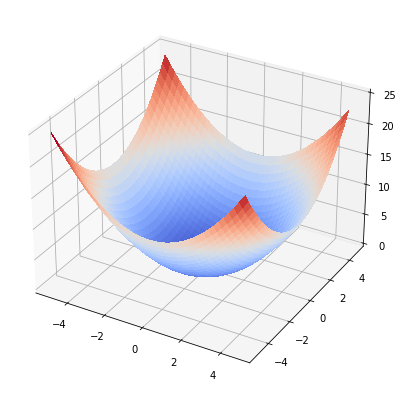

In [20]:
plot_scalar_field(u, -5,5,-5,5)

### 11.4.3 스칼라장을 등고선도로 플로팅하기
#### 히트맵과 유사한 등고선도라는 것이 있다.
#### 등고선도는 지형의 고도를 보여주는 지도이며 원들의 간격을 보며 경사도를 예측할 수 있다.
#### 원이 더 촘촘하게, 가깝게 위치하고 있으면 경사도가 가파르고, 반대로 넓게 포진하고 있으면 경사도가 낮다고 볼 수 있다.

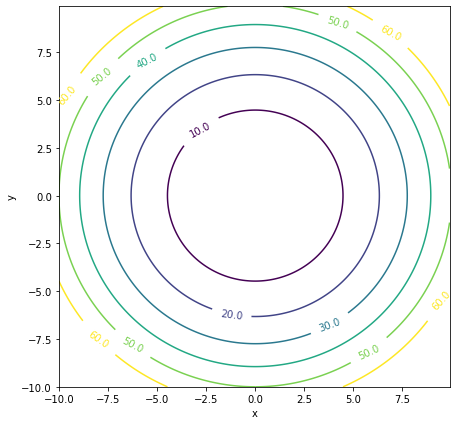

In [36]:
# 등고선 플로팅
def scalar_field_contour(f,xmin,xmax,ymin,ymax,levels = None):
    fv = np.vectorize(f)
    X = np.arange(xmin,xmax,0.1)
    Y = np.arange(ymin,ymax,0.1)
    X,Y = np.meshgrid(X,Y)
    
    Z = fv(X,Y)
    
    fig, ax = plt.subplots()
    CS = ax.contour(X,Y,Z,levels = levels)
    ax.clabel(CS,inline = 1, fontsize = 10, fmt = '%1.1f')
    plt.xlabel('x')
    plt.ylabel('y')
    fig.set_size_inches(7,7)
    
scalar_field_contour(u,-10,10,-10,10,levels = [10,20,30,40,50,60])

## 11.5 그라디언트로 에너지와 힘 연결하기
#### 위치에너지 함수의 경사도는 물체가 현재 상태에 정지해 있을 때 해당 방향으로 이동하도록 만들기 위해 필요한 에너지 소모량을 알려준다.
#### 그라디언트는 위치에너지와 같은 스칼라장을 입력으로 받아 중력장과 같은 벡터장을 생성하는 연산이다.
#### 평면의 모든 위치에서 그라디언트 벡터장은 스칼라장이 가장 빠르게 증가하는 방향을 향한다.
---
### 11.5.1 단면으로 경사도 측정하기

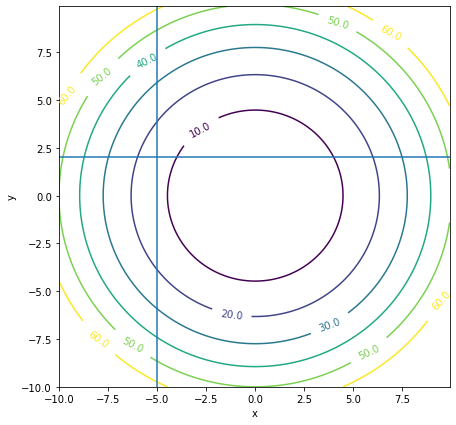

In [35]:
def scalar_field_contour1(f,xmin,xmax,ymin,ymax,levels = None):
    fv = np.vectorize(f)
    X = np.arange(xmin,xmax,0.1)
    Y = np.arange(ymin,ymax,0.1)
    X,Y = np.meshgrid(X,Y)
    
    Z = fv(X,Y)
    
    fig, ax = plt.subplots()
    CS = ax.contour(X,Y,Z,levels = levels)
    ax.clabel(CS,inline = 1, fontsize = 10, fmt = '%1.1f')
    plt.xlabel('x')
    plt.ylabel('y')
    fig.set_size_inches(7,7)
    plt.axhline(y=2)
    plt.axvline(x=-5)


scalar_field_contour1(u,-10,10,-10,10,levels = [10,20,30,40,50,60])

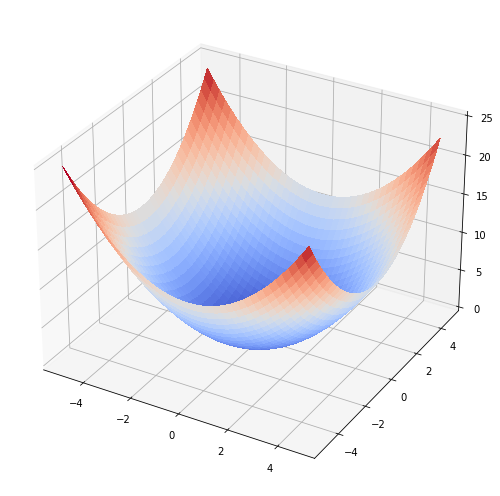

In [41]:
plot_scalar_field1(u, -5,5,-5,5)

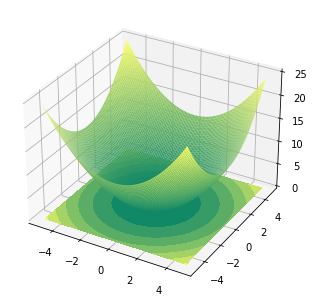

In [48]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = Axes3D(fig)

X = np.arange(-5,5,0.1)
Y = np.arange(-5, 5,0.1)
X,Y = np.meshgrid(X,Y)
Z =  1/2*(X**2+Y**2)


ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='summer')       # 3D 그래프 생성
ax.contourf(X,Y,Z, zdir='z', offset=0, cmap=plt.cm.summer)          # 등고선 생성
 
plt.show()

In [95]:
def plot_scalar_field1(f,xmin,xmax,ymin,ymax,xstep = 0.25, ystep = 0.25, c=None, cmap = cm.coolwarm, alpha = 1, antialiased = False):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection = '3d')
    
    fv = np.vectorize(f)
    X = np.arange(xmin,xmax,xstep)
    Y = np.arange(ymin, ymax, ystep)
    X,Y = np.meshgrid(X,Y)
    Z = fv(X,Y)
    
    x = -5
    ax1 = fig.add_subplot(111,projection = '3d')
    ax1.plot_surface(x,Y,Z,alpha = 0.5)

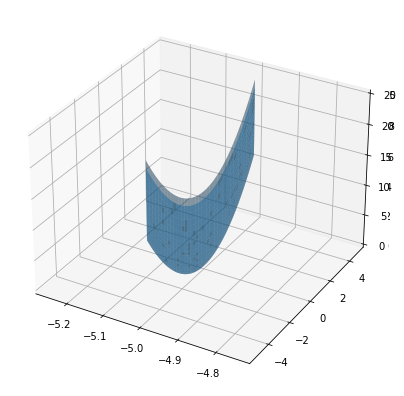

In [96]:
plot_scalar_field1(u, -5,5,-5,5)

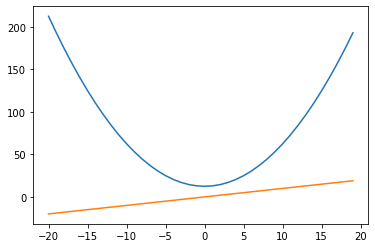

In [115]:
x = np.arange(-20,20)
y1 = 0.5*(x**2) + 12.5
y2 = x

plt.xlabel
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [135]:
def fx(x):
    return 0.5*(x**2) + 12.5

def differential(f,x):
    h = 1e-4
    return (f(x+h)+f(h))/2*h

def diff_line(f,x):
    d = differential(f,x)
    y = f(x) - d*x
    return lambda t : d*t + y

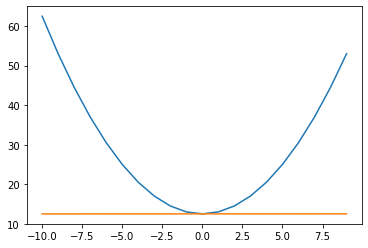

In [140]:
x = np.arange(-10,10)
y = fx(x)

plt.plot(x,y)
tf = diff_line(fx,0)
y2 = tf(x)
plt.plot(x,y2)
plt.show()

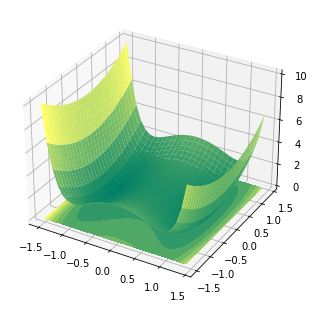

In [155]:

fig = plt.figure()
ax = Axes3D(fig)

X = np.arange(-1.5,1.5,0.1)
Y = np.arange(-1.5,1.5,0.1)
X,Y = np.meshgrid(X,Y)
Z =  1+(Y**2) - 2*(X**2) +(X**6)


ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='summer')       # 3D 그래프 생성
ax.contourf(X,Y,Z, zdir='z', offset=0, cmap=plt.cm.summer)          # 등고선 생성
 
plt.show()

In [143]:
def k(x,y):
    return -1+(y**2)-2*(x**2)+(x**6)

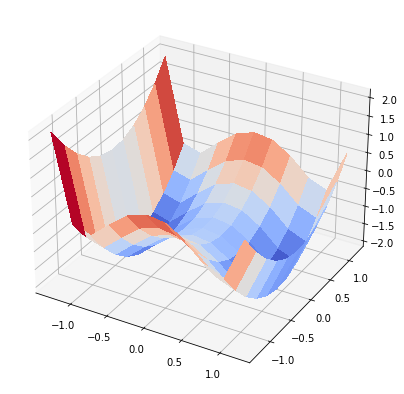

In [153]:
plot_scalar_field(k, -1.3,1.3,-1.3,1.3)